In [3]:
import numpy as np

# Listing the the number of variables and creating the associated indeces:
num_strains = 4
indeces_strains = np.array(range(1,num_strains+1))
num_promoters = 10
indeces_promoters = np.array(range(num_strains+1, num_strains+num_promoters+1))
num_secretion_signals = 4
indeces_secretion = np.array(range(num_strains+num_promoters+1, num_strains+num_promoters+num_secretion_signals+1))
num_genes = 4
indeces_genes = np.array(range(num_strains+num_promoters+num_secretion_signals+1, num_strains+num_promoters+num_secretion_signals+num_genes+1))


num_combinations = num_strains*num_genes*num_promoters*num_secretion_signals

print(f'Size combinatorial library: {num_combinations}')

Size combinatorial library: 640


In [4]:
print(indeces_strains)
print(indeces_promoters)
print(indeces_secretion)
print(indeces_genes)

[1 2 3 4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18]
[19 20 21 22]


In [5]:
# Iteratively initialize the combinatory library 

def init_comb_library(size):
    comb_library = [np.zeros(0) for i in range(size)]
    i = 0
    for idx1 in indeces_strains:
        for idx2 in indeces_promoters:
            for idx3 in indeces_secretion:
                for idx4 in indeces_genes:
                    comb_library[i] = [idx1, idx2, idx3, idx4]
                    i += 1
    return comb_library

In [34]:
# Initializing the set of constructs
import random

np.random.seed(578924431) # For an unbalanced sub-set, set seed to 42
percentage_comb_library = 10

num_constructs = int(np.rint(num_combinations/(100/percentage_comb_library)))

# Initializing the entire combinational library
comb_library = init_comb_library(num_combinations)

construct_indeces = np.random.choice(range(num_combinations), num_constructs, replace=False)
constructs = [comb_library[i] for i in construct_indeces]
constructs = np.array(constructs)
print(f'{num_constructs}')

print(f'First five constructs:')
print(constructs[:5])

64
First five constructs:
[[ 2  6 16 22]
 [ 4 11 18 19]
 [ 1  5 16 19]
 [ 1 11 18 19]
 [ 3  8 16 22]]


In [7]:
print(np.unique(constructs[:,0]))

[1 2 3 4]


Text(0.5, 1.0, 'Distribution of genes')

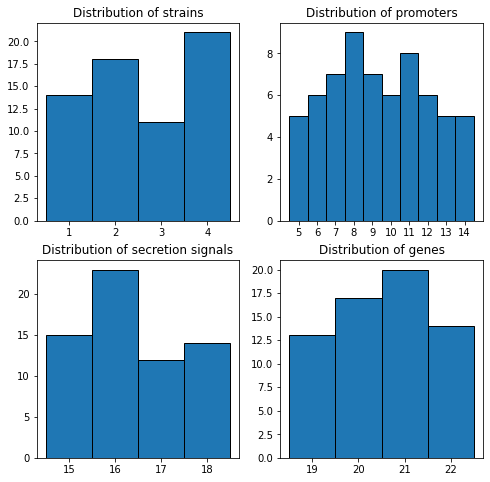

In [35]:
import matplotlib.pyplot as plt

# Plotting the occurances of each part withing the selected constructs

fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].hist(constructs[:,0], align='mid', bins=np.append(indeces_strains,5)-0.5, edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Distribution of strains')
axs[0][1].hist(constructs[:,1], align='mid', bins=np.append(indeces_promoters,15)-0.5, edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Distribution of promoters')
axs[1][0].hist(constructs[:,2], align='mid', bins=np.append(indeces_secretion,19)-0.5, edgecolor = 'black')
axs[1][0].set_title('Distribution of secretion signals')
axs[1][1].hist(constructs[:,3], align='mid', bins=np.append(indeces_genes,23)-0.5, edgecolor = 'black')
axs[1][1].set_title('Distribution of genes')

In [36]:
# Tranforming the 2d array into a one-hot-encoded panda.DataFrame

import pandas as pd

df = pd.DataFrame(constructs, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
print(df.head())
strains_art_oneh = pd.get_dummies(data=df, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
strains_art_oneh.head()

   str_idx  pro_idx  sec_idx  gen_idx
0        2        6       16       22
1        4       11       18       19
2        1        5       16       19
3        1       11       18       19
4        3        8       16       22


,str_idx_1,str_idx_2,str_idx_3,str_idx_4,pro_idx_5,pro_idx_6,pro_idx_7,pro_idx_8,pro_idx_9,pro_idx_10,...,pro_idx_13,pro_idx_14,sec_idx_15,sec_idx_16,sec_idx_17,sec_idx_18,gen_idx_19,gen_idx_20,gen_idx_21,gen_idx_22
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [78]:
## If handling different measurement types, first normalise the data. Should not be necessary if everything is one-hot encoded

# from sklearn.preprocessing import StandardScaler

# strains_art_oneh = StandardScaler().fit_transform(strains_art_oneh) # normalizing the features
# print(strains_art_oneh.shape)

# print(np.mean(strains_art_oneh),np.std(strains_art_oneh))
# print(strains_art_oneh[:5])

(90, 26)
-1.3474501666390789e-17 1.0
[[-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752  2.23606798 -0.24253563 -0.35355339 -0.37314944
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339  2.43373723
  -0.33333333 -0.35355339 -0.24253563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613  1.52752523 -0.5
  -0.53452248 -0.62017367]
 [-0.4108907  -0.

In [37]:
from sklearn.decomposition import PCA

# Starting the Principal Componant Analysis in order to determine wether each part adds sufficient variablity 
# to the set of selceted constructs

number_of_PCA_components = 20 # Select the number of principal components you with to analyse. Set to 8+10+4+4=26 to include all variability

pca_constructs = PCA(n_components=number_of_PCA_components)
principalComponents_constructs = pca_constructs.fit_transform(strains_art_oneh) 

print(f"sum of all components: {np.sum(pca_constructs.explained_variance_ratio_)}") # A measure of how much variability is included in the PCA. If 1.0, all variability is included
print(pca_constructs.explained_variance_ratio_) # Shows how much each PC contributes to the total amount of variability

eigenvalues = pca_constructs.components_ # Extracts the influence of each variable on each principle component

contributions_pca = (abs(eigenvalues)*100) / abs(eigenvalues).sum(axis=1, keepdims=True) # Expresses the contribution of each variable to a PC in percentages

#print(contributions_pca)
contributions_pca = pd.DataFrame(contributions_pca, columns = strains_art_oneh.columns)
print(np.sum(contributions_pca.iloc[0])) # Shows that the sum of the influence of each variable on the first PC is equal to 100% 
print(contributions_pca.iloc[0]) # Shows the relative influence of each variable on the first PC

sum of all components: 1.0
[1.34215454e-01 1.18680097e-01 1.05144805e-01 9.58773015e-02
 8.49547649e-02 7.84134911e-02 5.81035490e-02 5.01599320e-02
 4.73217074e-02 3.84511821e-02 3.26216081e-02 3.00403124e-02
 2.70467714e-02 2.53019092e-02 2.43909413e-02 2.04821530e-02
 1.51948769e-02 1.35991433e-02 1.10340200e-32 6.64412756e-33]
99.99999999999999
str_idx_1      5.265150
str_idx_2      8.330218
str_idx_3      0.949433
str_idx_4     12.645935
pro_idx_5      1.403962
pro_idx_6      1.235543
pro_idx_7      1.914011
pro_idx_8      1.940550
pro_idx_9      0.789976
pro_idx_10     3.130240
pro_idx_11     4.789054
pro_idx_12     1.958768
pro_idx_13     1.192852
pro_idx_14     0.038958
sec_idx_15     8.431943
sec_idx_16    14.113263
sec_idx_17     1.381231
sec_idx_18     4.300089
gen_idx_19    10.642439
gen_idx_20     2.235131
gen_idx_21    10.859281
gen_idx_22     2.451973
Name: 0, dtype: float64


In [38]:
# Obtain the percentage of variance originating from each variable by calculating the dot product between: 
# - the explained variance ratio of each PC 
# - how much each variable contributed to that PC

perc_var_per_parameter = np.dot(pca_constructs.explained_variance_ratio_, contributions_pca)


print(perc_var_per_parameter) # How much each variable contributed to the total variance in percentages
       
print(np.sum(perc_var_per_parameter)) # The sum of all percentages. Should be 100% if number_of_PCA_components=26

[5.14144676 6.10065601 4.57337369 6.25052728 2.92133983 3.46559123
 3.67369354 3.6298389  3.85669364 3.47936611 4.75098699 3.1285419
 2.7906857  3.16425484 5.53392297 6.28249794 4.36693138 5.36725083
 5.22178855 5.31417268 5.83498721 5.15145201]
99.99999999999999


Text(0.5, 1.0, 'Distribution of genes')

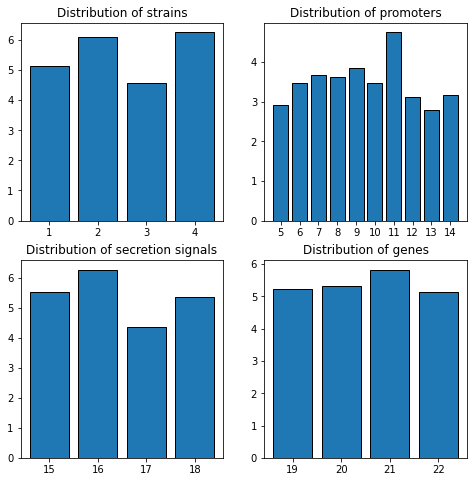

In [41]:
# Creating a bar plot of contribution of each variable to the total variance in perentages
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].bar(indeces_strains, perc_var_per_parameter[indeces_strains-1], edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Distribution of strains')
axs[0][1].bar(indeces_promoters, perc_var_per_parameter[indeces_promoters-1], edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Distribution of promoters')
axs[1][0].bar(indeces_secretion, perc_var_per_parameter[indeces_secretion-1], edgecolor = 'black')
axs[1][0].set_title('Distribution of secretion signals')
axs[1][1].bar(indeces_genes, perc_var_per_parameter[indeces_genes-1], edgecolor = 'black')
axs[1][1].set_title('Distribution of genes')